In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
#where to store the data
DATA_PATH = os.path.join('MP_Data') 

#signs to detect
signs = np.array(['Hello', 'How are you?', 'See you later!'])

#number of videos per sign
num_sequences = 30

#number of frames per video
num_frames = 30

In [3]:
#create a mapping of signs to numbers to use as labels
label_map = {label:num for num, label in enumerate(signs)}

label_map

{'Hello': 0, 'How are you?': 1, 'See you later!': 2}

In [4]:
#sequences will be ultimate by X and labels will be y
sequences, labels = [], []
#loop through the various signs
for sign in signs:
    #loop through each sequence (video)
    for sequence in range(num_sequences):
        #set up variable to store all of the frames for a given video
        window = []
        #loop through every frame for video
        for frame_num in range(num_frames):
            #load the frame's numpy array and save it
            res = np.load(os.path.join(DATA_PATH, sign, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        #add window (collection of video's frame arrays) and add it to X data variable
        sequences.append(window)
        labels.append(label_map[sign])

In [5]:
#this means there are 90 videos, 30 frames per video, and 1662 keypoints per frame
np.array(sequences).shape

(90, 30, 1662)

In [6]:
#90 labels for our 90 videos
np.array(labels).shape

(90,)

In [7]:
#convert sequences from list to a numpy array
X = np.array(sequences)

X.shape

(90, 30, 1662)

In [8]:
#one hot encoding for the labels
y = to_categorical(labels).astype(int)

y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [9]:
#split the data for 10% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [10]:
y_test.shape

(18, 3)

In [11]:
y_train.shape

(72, 3)

In [12]:
model = Sequential()
model.add(GRU(30, return_sequences=True, activation='relu', input_shape=(30,1662), dropout = 0.1))
model.add(GRU(20, return_sequences=True, activation='relu', dropout = 0.1))
model.add(GRU(10, return_sequences=False, activation='relu', dropout = 0.1))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(signs.shape[0], activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=50, batch_size = 8, validation_data = (X_test, y_test))

Epoch 1/50
9/9 [==============================] - 12s 479ms/step - loss: 1.1193 - accuracy: 0.2778 - val_loss: 1.0962 - val_accuracy: 0.4444
Epoch 2/50
9/9 [==============================] - 3s 291ms/step - loss: 1.1098 - accuracy: 0.3194 - val_loss: 1.1008 - val_accuracy: 0.2222
Epoch 3/50
9/9 [==============================] - 2s 280ms/step - loss: 1.1119 - accuracy: 0.3333 - val_loss: 1.0922 - val_accuracy: 0.4444
Epoch 4/50
9/9 [==============================] - 2s 246ms/step - loss: 1.0963 - accuracy: 0.3472 - val_loss: 1.0890 - val_accuracy: 0.4444
Epoch 5/50
9/9 [==============================] - 2s 274ms/step - loss: 1.0939 - accuracy: 0.4306 - val_loss: 1.0730 - val_accuracy: 0.3333
Epoch 6/50
9/9 [==============================] - 2s 247ms/step - loss: 1.0852 - accuracy: 0.4028 - val_loss: 1.0580 - val_accuracy: 0.2222
Epoch 7/50
9/9 [==============================] - 2s 232ms/step - loss: 1.0611 - accuracy: 0.3750 - val_loss: 1.0686 - val_accuracy: 0.2222
Epoch 8/50
9/9 [===

In [15]:
_, acc = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 53ms/step - loss: 0.2060 - accuracy: 0.9444


In [16]:
#this is an unusually high accuracy but this is due to the small size of the
#custom dataset
acc

0.9444444179534912

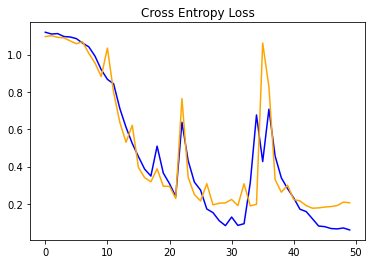

In [17]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')

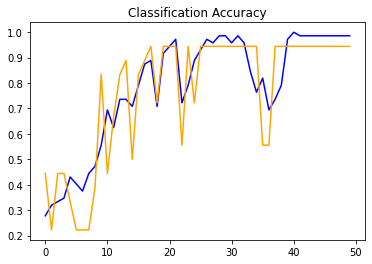

In [18]:

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 30)            152460    
                                                                 
 gru_1 (GRU)                 (None, 30, 20)            3120      
                                                                 
 gru_2 (GRU)                 (None, 10)                960       
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
Total params: 156,723
Trainable params: 156,723
Non-trai

In [20]:
model.save('sign_language_detection.h5')